In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import mdtraj


In [10]:

#BGangles = np.loadtxt("HNCanglesBG.dat", usecols=1)
#MDangles = np.loadtxt("HNCanglesMD.dat", usecols=1)

def plot_dof_comparison(BGdof, MDdof, dofname):  
    fig, ax = plt.subplots()    

    if 'bond' in dofname:
        ax.set_xlabel(f"{dofname} ($\AA$)")
    if 'angle' in dofname:
        ax.set_xlabel(f"{dofname} ($^\circ$)")
    if 'dihed'in dofname:
        ax.set_xlabel(f"{dofname} ($^\circ$)")
    # y-axis on the right
    
    ax.hist(BGdof, bins=40, label="BG", alpha=1)
    ax.hist(MDdof, bins=40, label="MD", alpha=0.5)
    ax.set_ylabel(f"Count   [#{dofname} / {len(MDdof)}]")
    ax.legend()
    plt.savefig(f"Histogramsoriginal/{dofname}.png")
    plt.close

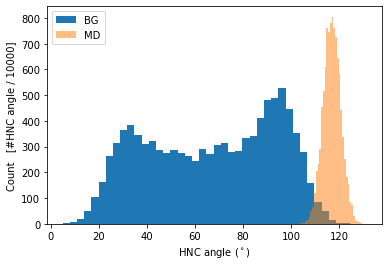

In [62]:
#plot_dof_comparison(BGangles,MDangles,"HNC angle")

In [23]:
import pytraj as pt
trajectory_bg = pt.load('samplestraj2000mixed.pdb', top='test.prm7')
trajectory_md = pt.load('mdtraj.pdb',top= 'test.prm7',stride=100)
#trajectory_md2 = mdtraj.load('output.h5')

In [24]:
def calc_bonds(trajectory,type):
    bonds = {}
    for bond in trajectory.topology.bonds:
        bonds[str(bond.indices)] = pt.calc_distance(trajectory, bond.indices)[0]
    df = pd.DataFrame(bonds)
    #df.to_csv(f'{type}bonds.csv')
    return df

In [25]:
for bond in trajectory_md.topology.bonds:
    print(bond)
BGbonds = calc_bonds(trajectory_bg, type='BG')
MDbonds = calc_bonds(trajectory_md, type='MD2')
#
# print(BGbonds)
#print(trajectory_md2.topology.bonds())
#list(BGbonds.columns)


Index(['[4 5]', '[4 6]', '[1 4]', '[14 15]', '[14 16]', '[ 8 10]', '[ 8 14]',
       '[6 8]', '[16 18]', '[1 2]', '[1 3]', '[0 1]', '[10 11]', '[10 12]',
       '[10 13]', '[8 9]', '[6 7]', '[18 19]', '[18 20]', '[18 21]',
       '[16 17]'],
      dtype='object')
10000


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


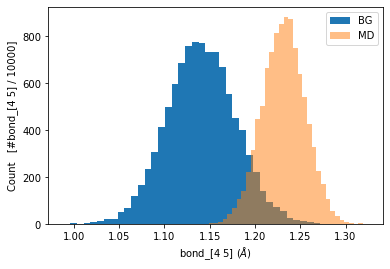

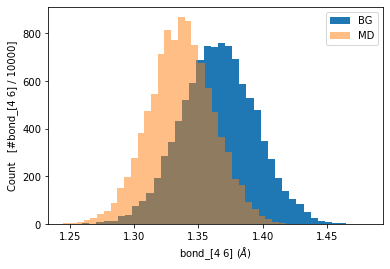

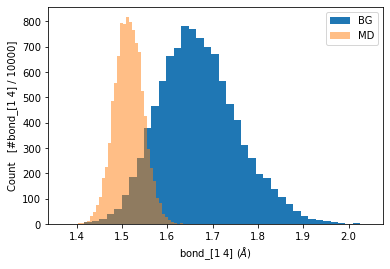

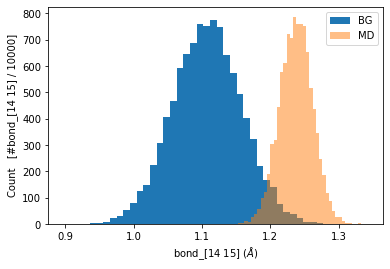

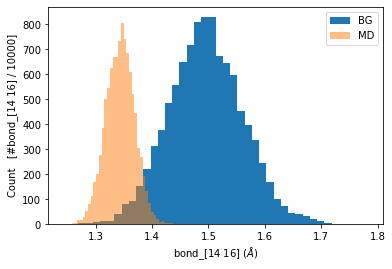

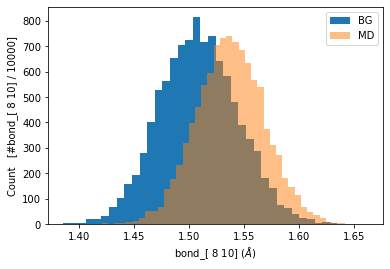

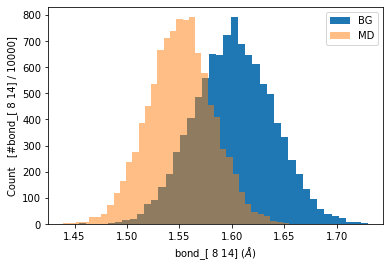

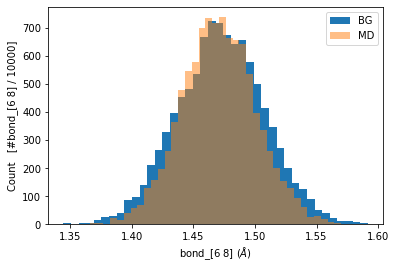

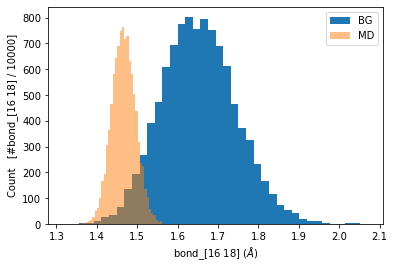

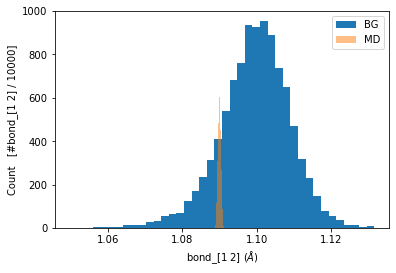

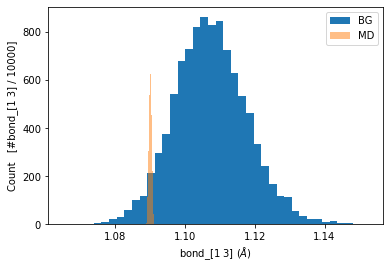

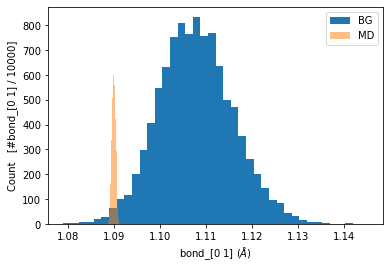

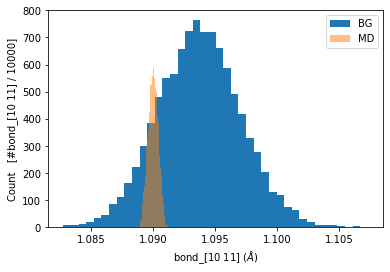

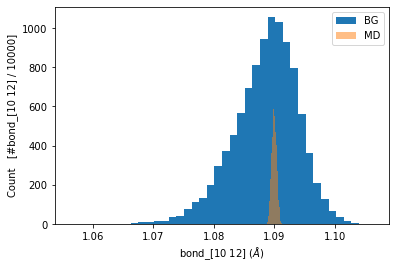

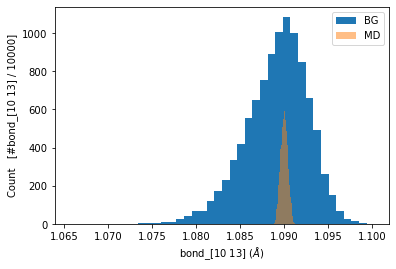

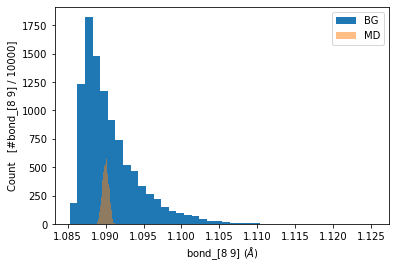

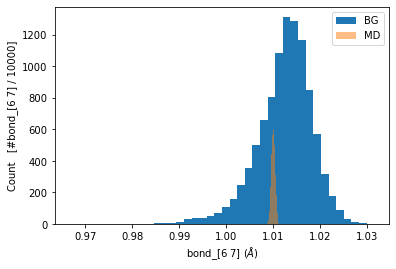

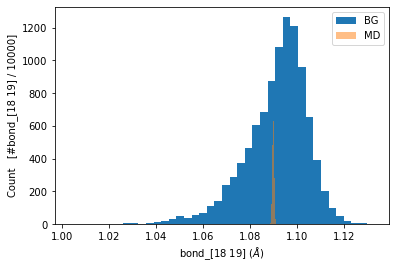

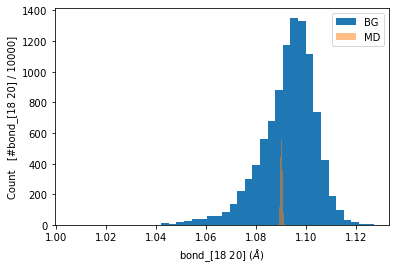

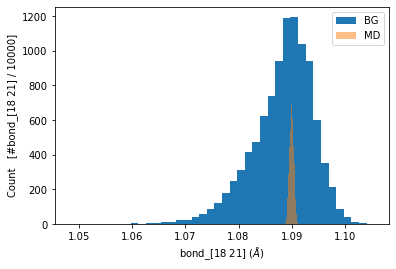

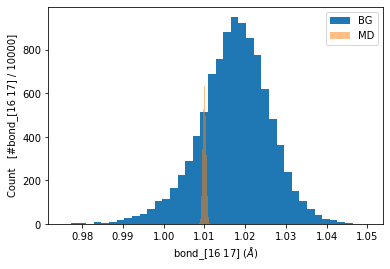

In [26]:
print(BGbonds.columns)
print(len(MDbonds))

#plot_dof_comparison(BGbonds['[1 0]'],MDbonds['[1 0]'], dofname='bond_[1_0]')

for col in BGbonds.columns:
    plot_dof_comparison(BGbonds[col],MDbonds[col], dofname=f'bond_{col}')

In [ ]:
test = pt.load('samplestraj2000mixed.pdb', top='ala.prm7')

In [27]:
def calc_diheds(trajectory,type):
    diheds = {}
    for dihedral in trajectory.topology.dihedrals:
        #print(dihedral)
        diheds[str(dihedral.indices)] = pt.calc_dihedral(trajectory, dihedral.indices)[0]

    df = pd.DataFrame(diheds)
    df.to_csv(f'{type}diheds.csv')
    return df


In [28]:
BGdiheds = calc_diheds(trajectory_bg,'BG')
MDdiheds = calc_diheds(trajectory_md,'MD')


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


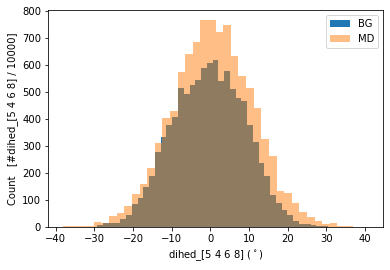

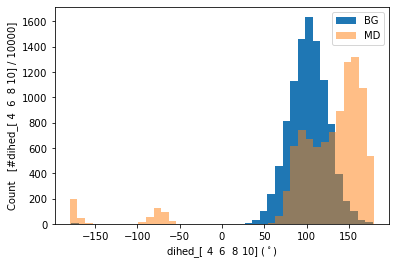

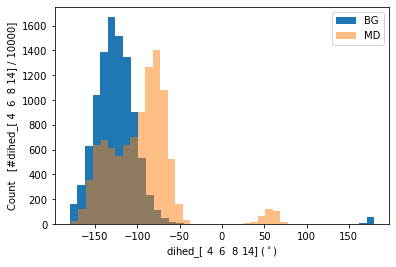

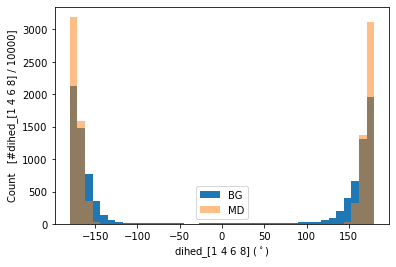

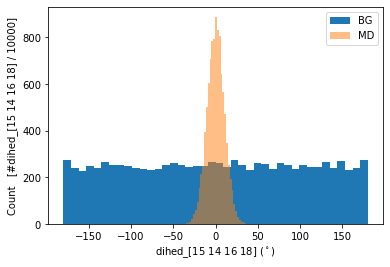

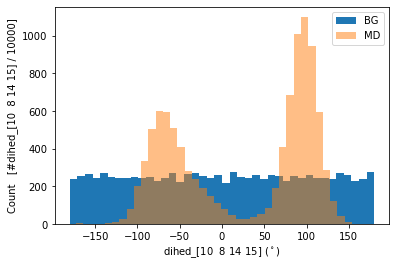

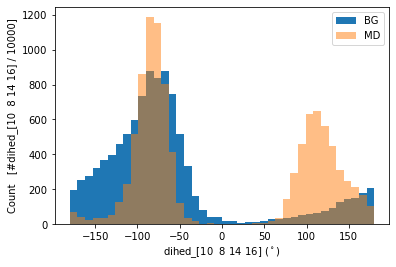

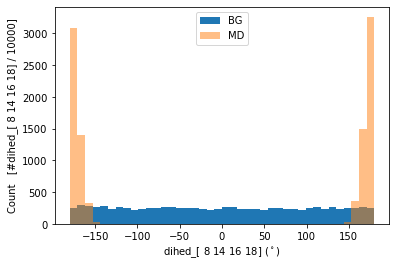

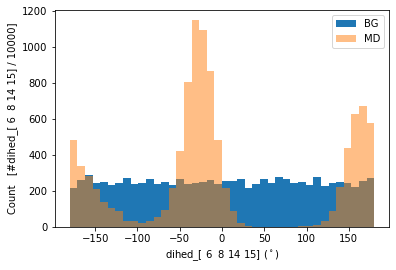

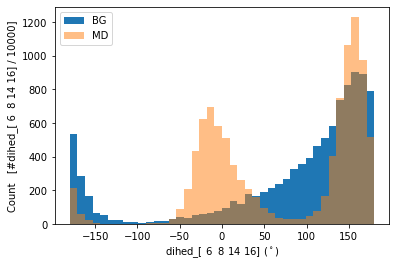

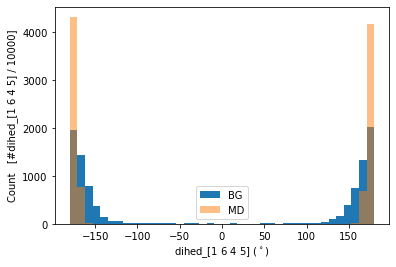

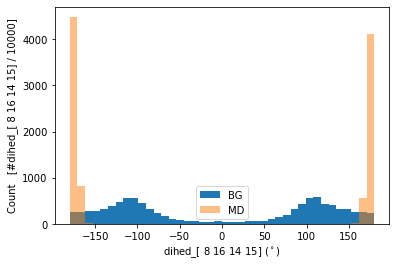

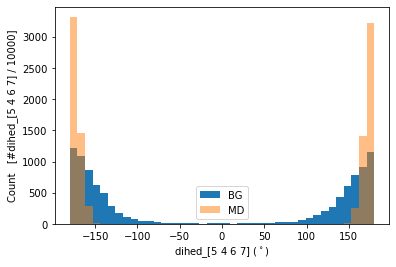

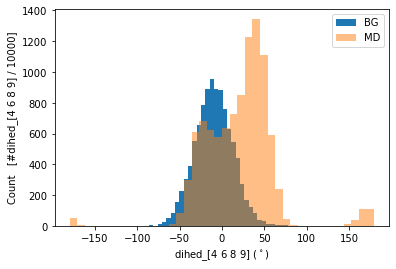

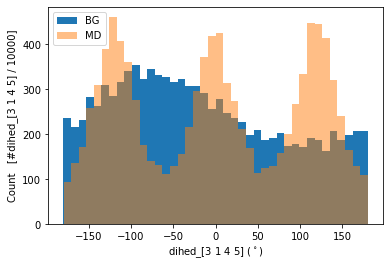

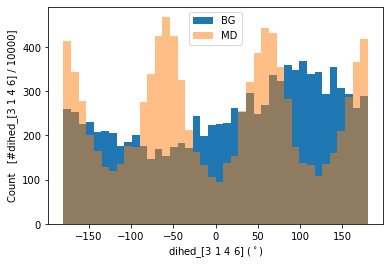

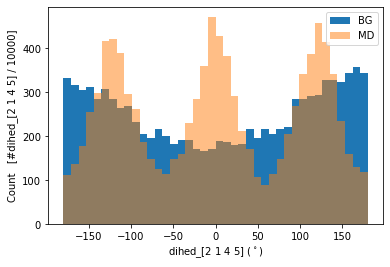

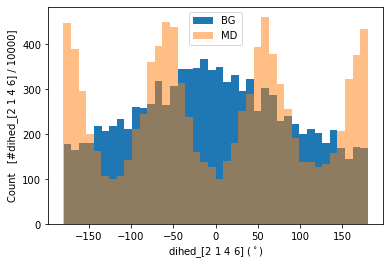

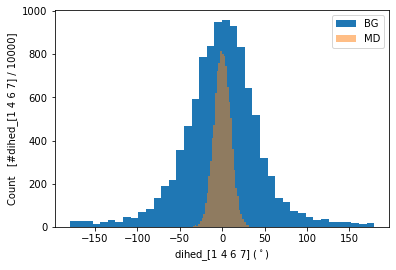

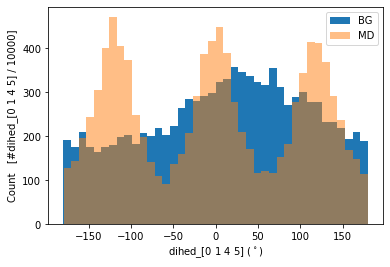

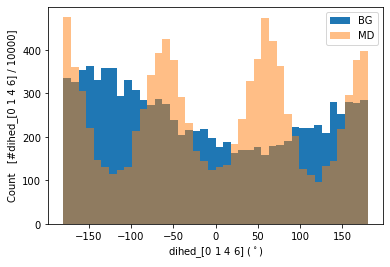

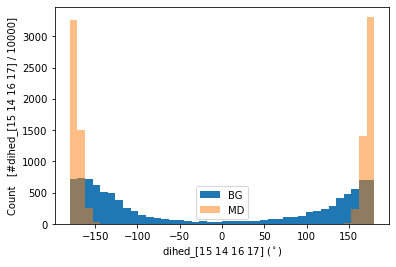

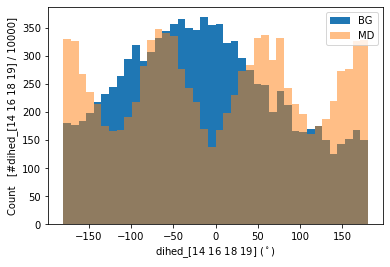

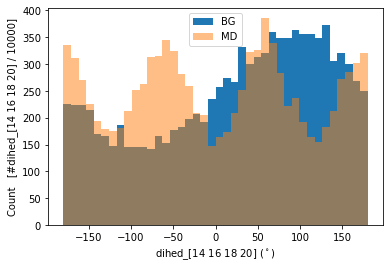

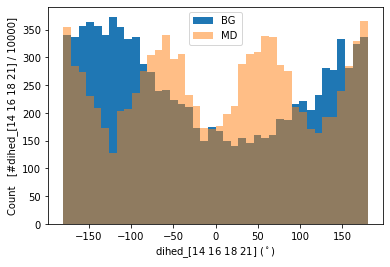

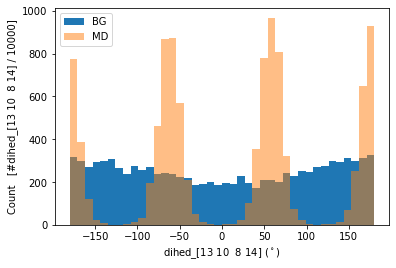

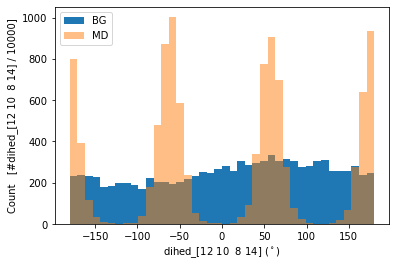

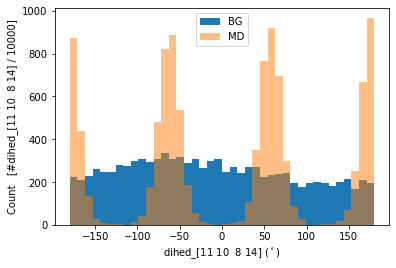

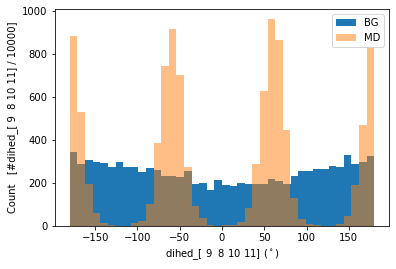

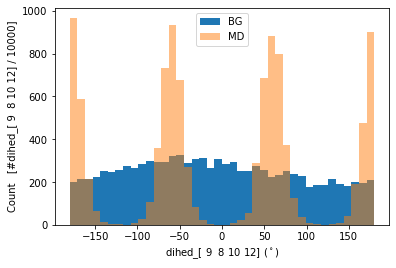

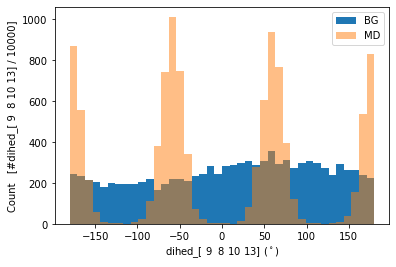

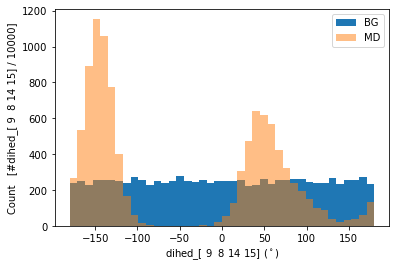

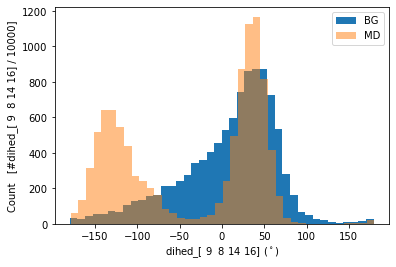

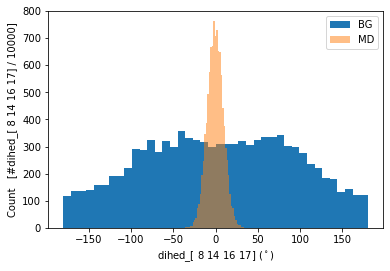

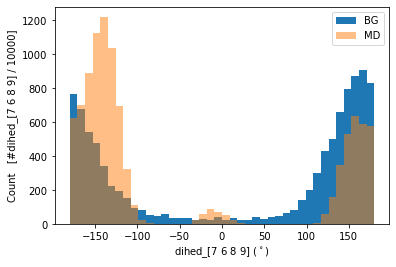

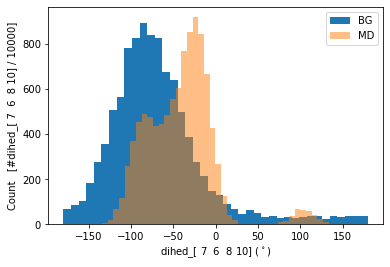

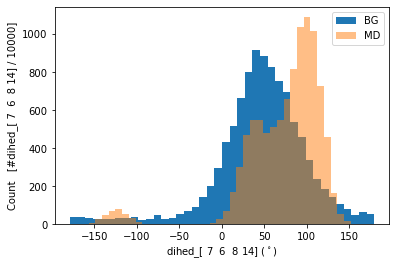

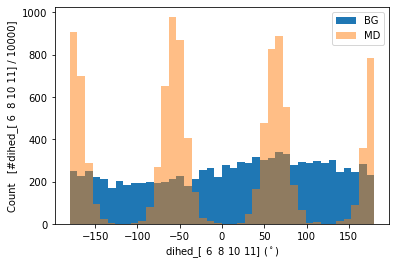

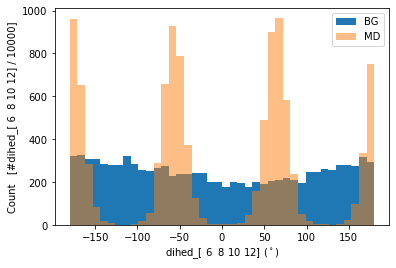

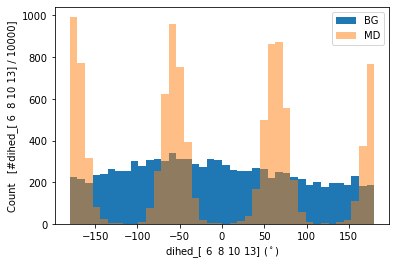

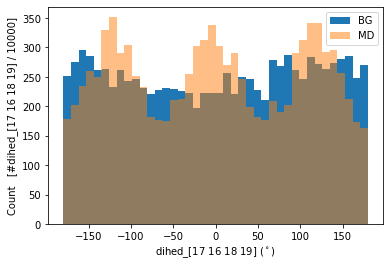

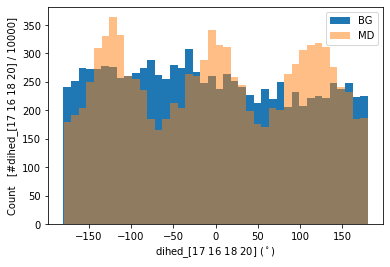

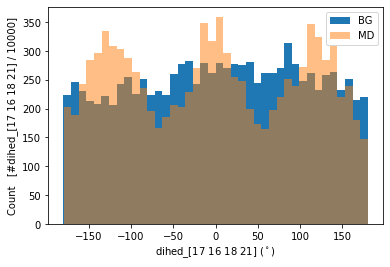

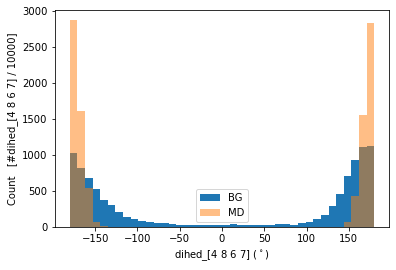

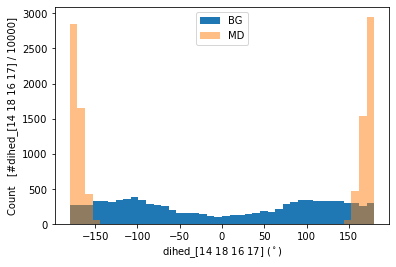

In [29]:
#print(BGdiheds.columns)
for col in BGdiheds:
    plot_dof_comparison(BGdiheds[col],MDdiheds[col], dofname=f'dihed_{col}')
#plot_dof_comparison(BGdiheds['[5 4 6 8]'],MDdiheds['[5 4 6 8]'], dofname='dihed_[5 4 6 8]')

In [30]:
#separate_anglemasks = np.loadtxt('ala_angles.txt', dtype=str, usecols=(3,4,5))

#anglemasks = []
#f#or row in separate_anglemasks:
    #anglemasks.append(row[1]&row[2]&row[3])

anglemasks = pd.read_csv('ala_angles.txt',delim_whitespace=True,usecols=[3,4,5,6,7,8])

#print(anglemasks)
#print(anglemasks.keys)
#print(anglemasks.columns)
anglemasks['full'] = anglemasks[['Atom1','Atom2','Atom3']].agg(" ".join, axis=1)
anglemasks['indices'] = anglemasks[['A1','A2','A3']].astype(str).agg(" ".join, axis=1)
#(" ".join, axis=1)
print(anglemasks['indices'])

0        5 7 8
1        4 2 5
2        3 2 4
3        3 2 5
4        1 2 3
5        1 2 4
6        1 2 5
7     15 17 18
8     13 11 14
9     12 11 13
10    12 11 14
11     10 9 11
12     10 9 15
13     9 11 12
14     9 11 13
15     9 11 14
16       8 7 9
17      7 9 10
18    21 19 22
19    20 19 21
20    20 19 22
21    18 17 19
22    17 19 20
23    17 19 21
24    17 19 22
25       6 5 7
26       5 7 9
27       2 5 6
28       2 5 7
29    16 15 17
30    15 17 19
31     11 9 15
32     9 15 16
33     9 15 17
34      7 9 11
35      7 9 15
Name: indices, dtype: object


In [31]:
def calc_angles(trajectory,type):
    angles = {}
    for maskset in anglemasks['full']:
        #print(maskset)
        angles[maskset] = pt.calc_angle(trajectory, str(maskset))

    df = pd.DataFrame(angles,)
    df.to_csv(f'{type}angles.csv')
    return df


In [32]:
print(anglemasks['full'][1])
pt.calc_angle(trajectory_bg, anglemasks['full'][1])

anglesBG = calc_angles(trajectory_bg, 'BG')
anglesMD = calc_angles(trajectory_md, type='MD')

:1@H3 :1@CH3 :1@C


/home/abbie/miniconda3/envs/bgflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


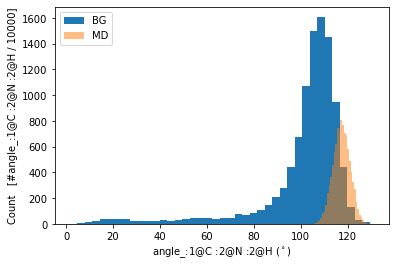

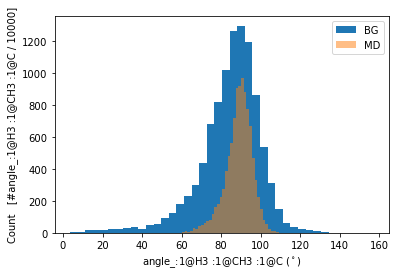

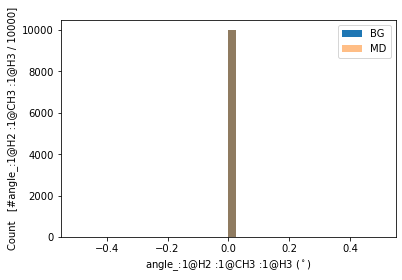

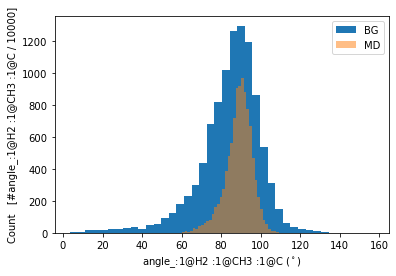

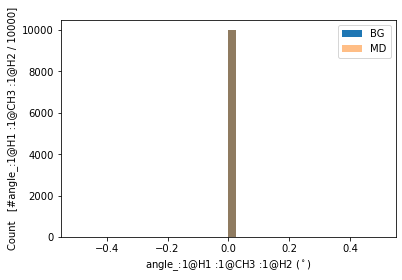

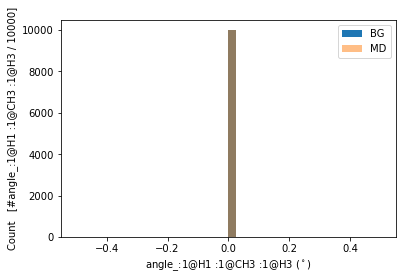

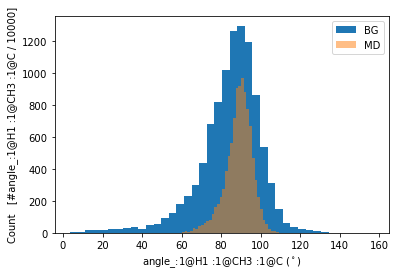

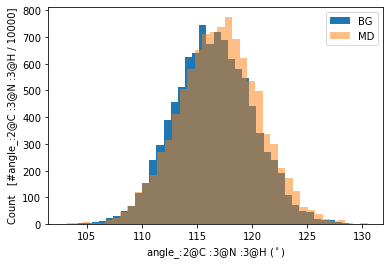

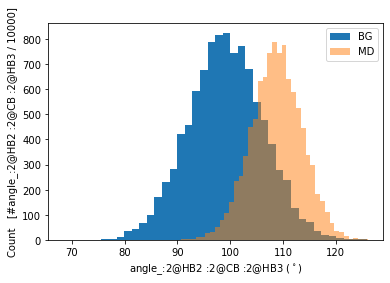

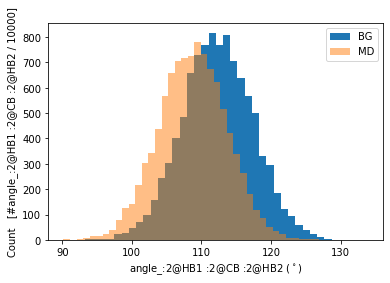

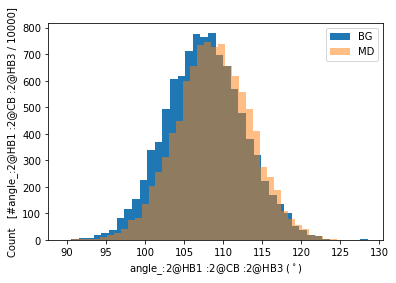

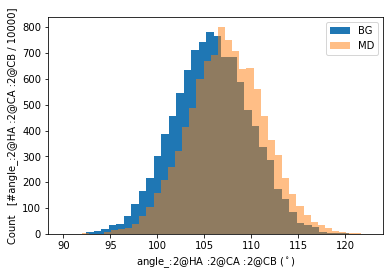

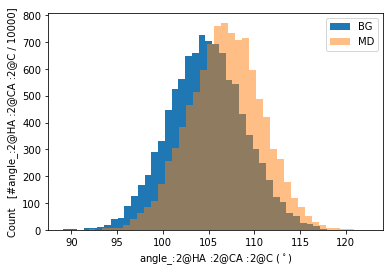

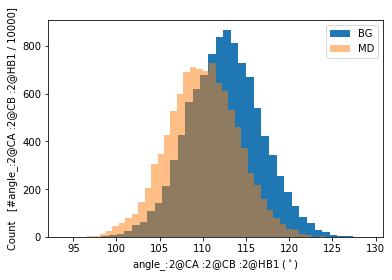

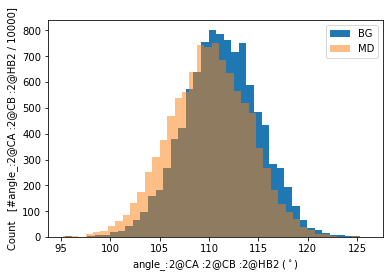

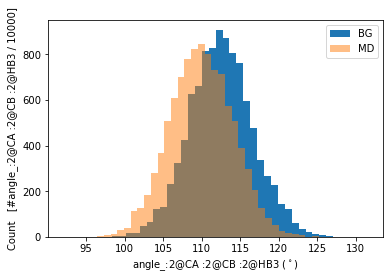

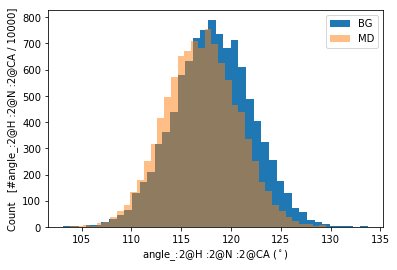

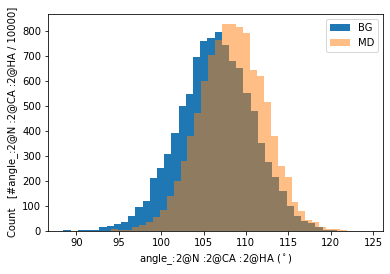

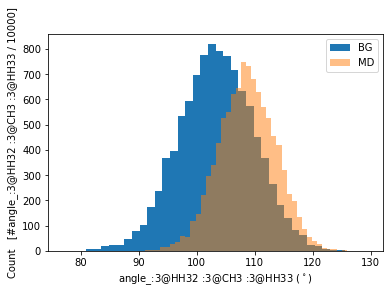

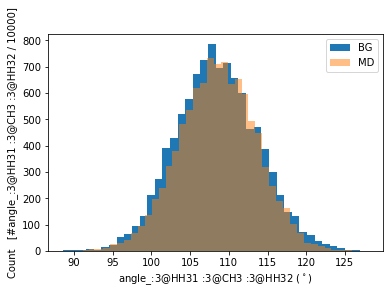

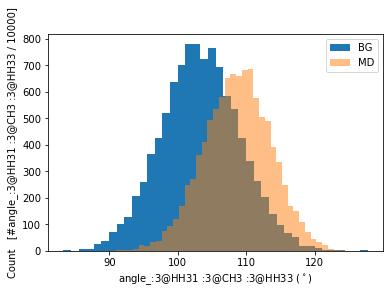

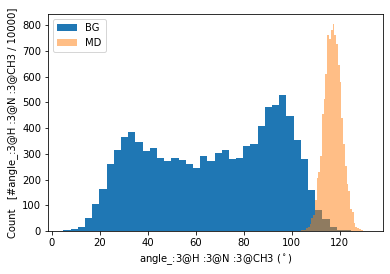

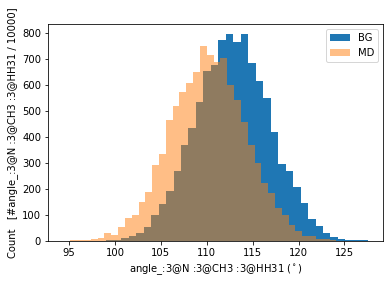

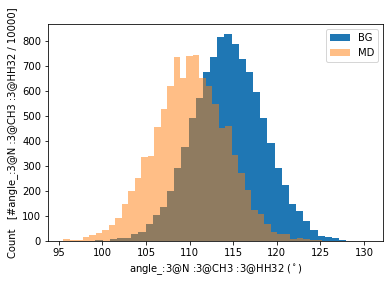

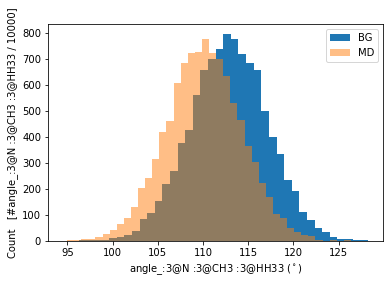

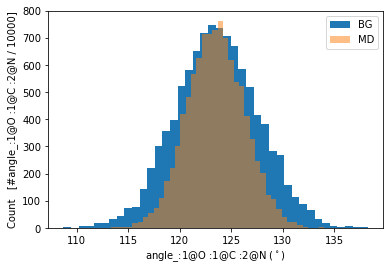

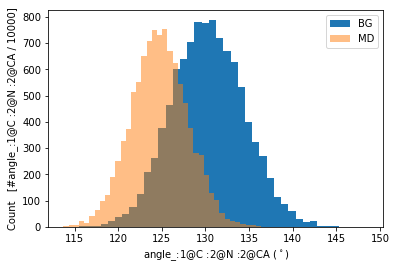

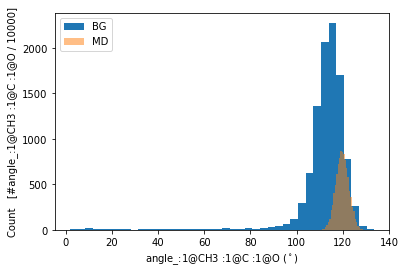

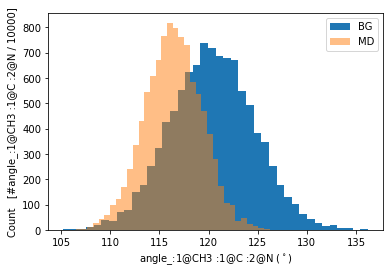

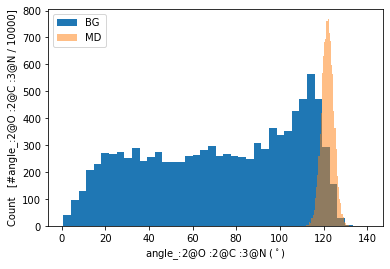

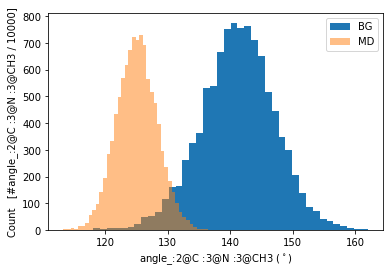

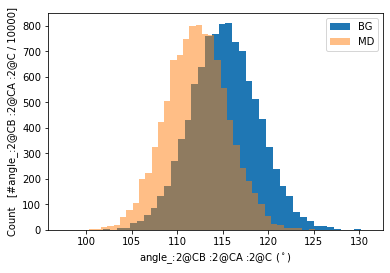

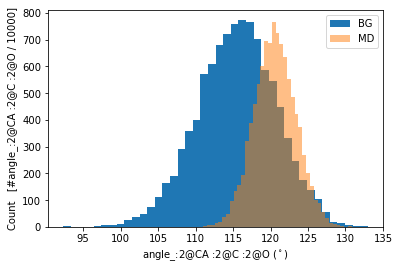

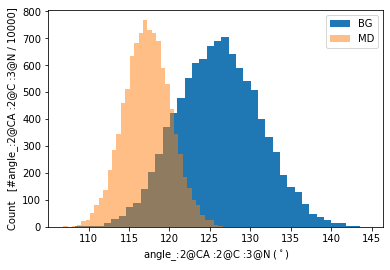

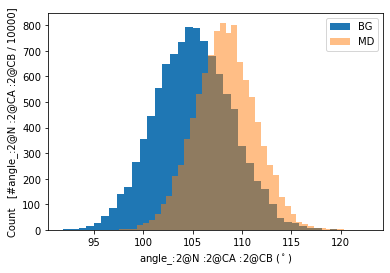

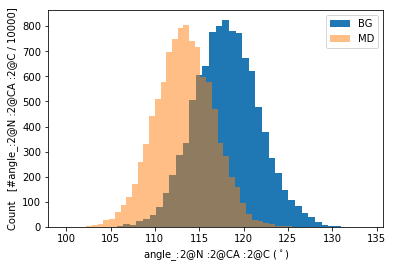

In [33]:
for col in anglesBG:
    plot_dof_comparison(anglesBG[col],anglesMD[col], dofname=f'angle_{col}')

In [34]:
plt.close('all')
